# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [13]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [15]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape)

(784, 70000)
(1, 70000)


### Select two classes

In [16]:
filtered_data = []
filtered_labels = []
for i in range(len(y)):
  classification = y1[0,i]
  if y[i] in ['3','8']:
    filtered_data.append(X1[:,i])
    filtered_labels.append([0] if classification == '3' else [1])

### Split the data into Train set and Test set

In [17]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = np.array(filtered_data)
Y = np.array(filtered_labels)

# Use shuffle on the train data
X, y = shuffle(X, Y)

split = int(len(Y) * 0.7)

X_train, X_test = np.array(X[:split]).T, np.array(X[split:]).T
Y_train, Y_test = np.array(y[:split]), np.array(y[split:])

print(X_train, X_train.shape)
print(Y_train, Y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (784, 9800)
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]] (9800, 1)


### Test yourself

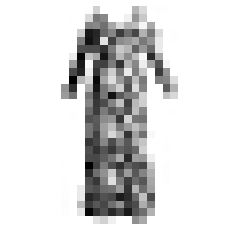

0

In [29]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [8]:
#TODO: Sigmoid activation function
def sigmoid(z):
    z128 = np.float128(z)
    return 1/(1 + np.exp(-z128))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [9]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

## NN Hyper Parameters

In [49]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 20
learning_rate = 0.05
epochs = 30

## Weight and Bias Initialization

In [50]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(20, 784)
(20, 1)
(1, 20)
(1, 1)


## Training (30%)

In [51]:
def sigmoid_deriv(z):
  return sigmoid(z) * (1 - sigmoid(z))

X = X_train
Y = Y_train

loss_list = []
epoch_list = []
numOfTraining = Y.size

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    Z1 = np.matmul(W1,X[:,j].reshape(input_layer,1)) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    Yout = np.array([Y[j][0]]).reshape(1,1)

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # TODO: Back propagation
    size = Y.size
    dZ2 = (A2-Yout)
    dW2 = dZ2.dot(A1.T)
    db2 = np.sum(dZ2)    
    dA1 = sigmoid_deriv(Z1)

    dZ1 = W2.T.dot(dZ2) 
    dW1 = dZ1.dot(X[:,j].reshape(784,1).T)
    db1 = np.sum(dZ1)

    # TODO: Update weights
    W2 = W2 -(learning_rate * (dW2))
    b2 = b2 - (learning_rate * db2)
    W1 = W1 -(learning_rate * (dW1))
    b1 = b2 - (learning_rate * db2)


  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.06267348474495911815
Epoch 1  Loss: 0.044984720654099734424
Epoch 2  Loss: 0.03958326922009147376
Epoch 3  Loss: 0.037301325726007032972
Epoch 4  Loss: 0.03568659956143704671
Epoch 5  Loss: 0.034728996043162080427
Epoch 6  Loss: 0.03381355041807031547
Epoch 7  Loss: 0.0332516853170301362
Epoch 8  Loss: 0.032601005828981212626
Epoch 9  Loss: 0.032244904799228294237
Epoch 10  Loss: 0.03171597967609586495
Epoch 11  Loss: 0.030935499468767256612
Epoch 12  Loss: 0.03052179273010908166
Epoch 13  Loss: 0.029851016185581040738
Epoch 14  Loss: 0.029723810569704859865
Epoch 15  Loss: 0.029149218093532802645
Epoch 16  Loss: 0.029010106969668314475
Epoch 17  Loss: 0.02858030963164470761
Epoch 18  Loss: 0.028141455449709961808
Epoch 19  Loss: 0.027852202558165020768
Epoch 20  Loss: 0.027752959680020093607
Epoch 21  Loss: 0.027785808702543159478
Epoch 22  Loss: 0.0276208207715085399
Epoch 23  Loss: 0.027342860305572739096
Epoch 24  Loss: 0.027487336547228010876
Epoch 25  Loss: 0.027

### Loss Visualization

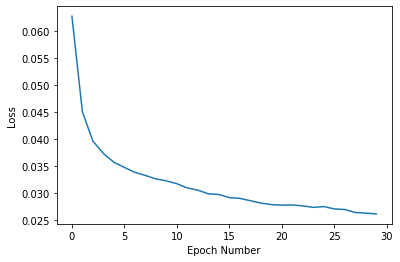

In [52]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (30%)

In [38]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1,X_test) + b1
A1 = sigmoid(Z1)
Z2 = W2.dot(A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))

[[2057   19]
 [  28 2096]]


### Visualize the results

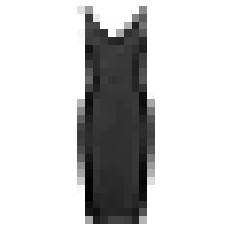

Real= 0 Predicted= 0.0061913405308161991437


In [44]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

i = random.randint(2000)
plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_test[i,0]

Z1 = np.matmul(W1,X_test[:,i]) 
A1 = sigmoid(Z1)
Z2 = W2.dot(A1) + b2
A2 = sigmoid(Z2)
Yout = Y[i,0] 
print("Real=", Y_test[i,0], "Predicted=",A2[0,0])